# Explore here

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X.shape

(768, 8)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1987)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
rfc_model = RandomForestClassifier(max_depth=8)

rfc_model.fit(X_train, y_train)

train_preds = rfc_model.predict(X_train)
test_preds = rfc_model.predict(X_test)

In [38]:
accuracy_score(y_train, train_preds)

0.9478827361563518

In [39]:
accuracy_score(y_test, test_preds)

0.7922077922077922

In [40]:
pd.DataFrame([rfc_model.feature_names_in_, rfc_model.feature_importances_]).T

,0,1
0,Pregnancies,0.078767
1,Glucose,0.263206
2,BloodPressure,0.075508
3,SkinThickness,0.071267
4,Insulin,0.080611
5,BMI,0.168096
6,DiabetesPedigreeFunction,0.126889
7,Age,0.135656


In [41]:
from sklearn import tree


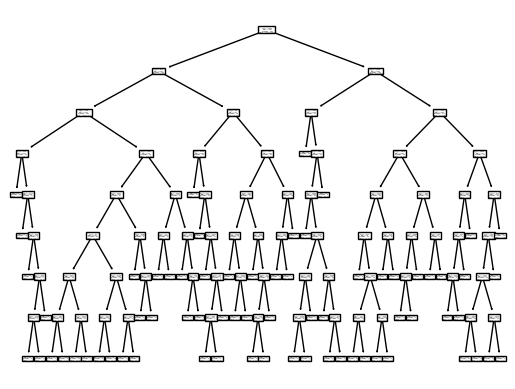

In [42]:
tree.plot_tree(rfc_model.estimators_[0])
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV

In [60]:
hyperparameters = {
    "n_estimators" : [20, 50, 100, 150], 
    "max_depth" : [2, 5, 8, 10],
    "min_samples_split" : [2, 4, 6, 8],
    "min_samples_leaf" : [2, 4, 8]

}

In [68]:
#base_rf_model = RandomForestClassifier()

grid_model = GridSearchCV(RandomForestClassifier(random_state=25), param_grid=hyperparameters, scoring="accuracy", cv = 5)

In [69]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=25),
             param_grid={'max_depth': [2, 5, 8, 10],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [20, 50, 100, 150]},
             scoring='accuracy')

In [70]:
grid_model.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=50,
                       random_state=25)

In [86]:
new_rfc_model = RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=50, random_state=25)

In [87]:
new_rfc_model.fit(X_train, y_train)
y_pred = new_rfc_model.predict(X_test)

In [93]:
accuracy_score(y_test, y_pred)

0.7597402597402597

In [91]:
confusion_matrix(y_test, test_preds)

array([[89, 12],
       [20, 33]])